<a href="https://colab.research.google.com/github/Surya-0804/Nuts-and-Bolts-of-Deep-Learning-Workshop/blob/main/Phase%20II/Day%202/Nuts_and_Bolts_of_DL(phase_II)_Neural_Network_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torchvision.datasets import MNIST
from torch.utils.data import DataLoader, random_split
import matplotlib.pyplot as plt


In [ ]:

# Define transformations for the dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Load the MNIST dataset
train_dataset = MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = MNIST(root='./data', train=False, download=True, transform=transform)

# Split the training dataset into training and validation sets
train_size = int(0.1 * len(train_dataset))
val_size = len(train_dataset) - train_size
train_dataset, val_dataset = random_split(train_dataset, [train_size, val_size])

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)


Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 16109996.06it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 496514.74it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 4338204.21it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 4319847.79it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [ ]:

# Define the Neural Network Model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28 * 28, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 56)
        self.fc4 = nn.Linear(56, 10)

    def forward(self, x):
        x = self.flatten(x)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = torch.softmax(self.fc4(x), dim=1)
        return x


In [ ]:
# Initialize the model, loss function, and optimizer
model = NeuralNetwork()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
# Train the Model
num_epochs = 50
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/len(train_loader)}")


Epoch 1/50, Loss: 1.973043610440924
Epoch 2/50, Loss: 1.7202881219539237
Epoch 3/50, Loss: 1.6348684113076393
Epoch 4/50, Loss: 1.5865505375760667
Epoch 5/50, Loss: 1.5684269032579787
Epoch 6/50, Loss: 1.564722456830613
Epoch 7/50, Loss: 1.5531830749613174
Epoch 8/50, Loss: 1.5516694860255464
Epoch 9/50, Loss: 1.5367465120680788
Epoch 10/50, Loss: 1.5334216115322519
Epoch 11/50, Loss: 1.5260047329233049
Epoch 12/50, Loss: 1.525919328344629
Epoch 13/50, Loss: 1.5226820973639792
Epoch 14/50, Loss: 1.5193534341264279
Epoch 15/50, Loss: 1.5131641055675262
Epoch 16/50, Loss: 1.5115216260260724
Epoch 17/50, Loss: 1.5114747032206108
Epoch 18/50, Loss: 1.5082038780476184
Epoch 19/50, Loss: 1.5093693517624063
Epoch 20/50, Loss: 1.504523808651782
Epoch 21/50, Loss: 1.5034237377187039
Epoch 22/50, Loss: 1.5038757615901055
Epoch 23/50, Loss: 1.505189451765507
Epoch 24/50, Loss: 1.5053276267457516
Epoch 25/50, Loss: 1.4994296418859603
Epoch 26/50, Loss: 1.5093049356277952
Epoch 27/50, Loss: 1.50541

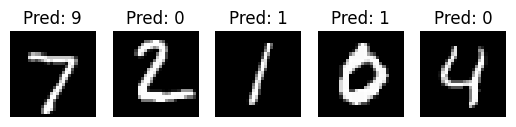

In [ ]:
# Make Predictions
model.eval()
predictions = []
with torch.no_grad():
    for inputs, _ in train_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        predictions.extend(predicted.numpy())

# Visualize Results (Optional)
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(test_dataset[i][0].squeeze(), cmap='gray')
    plt.title(f'Pred: {predictions[i]}')
    plt.axis('off')
plt.show()